<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

park_info = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/san_francisco/parks/park_info.csv')
park_scores = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/san_francisco/parks/park_scores.csv')

In [2]:
parks = park_info.merge(park_scores, how='left', on='ParkID')
parks = parks.drop(['ParkServiceArea', 'PSAManager', 'email', 'Number', 'Lat'], axis=1).dropna()

In [3]:
# Hypothesis: larger parks receive higher scores

In [4]:
parks_avg = parks.groupby('ParkName', as_index=False).mean()

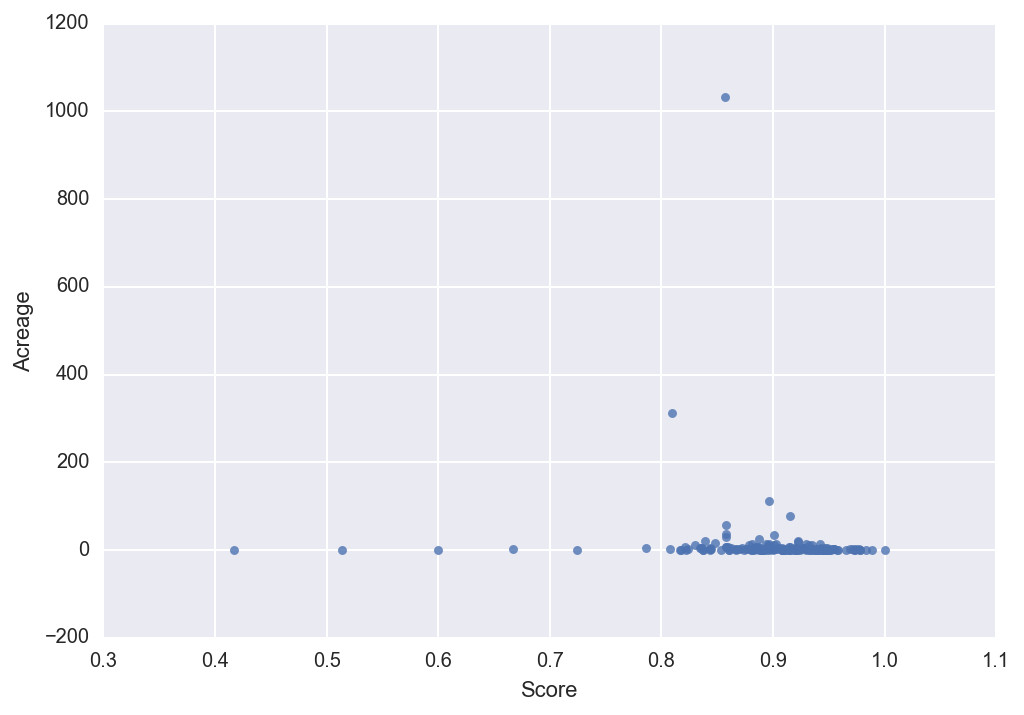

In [5]:
import seaborn as sns

sns.regplot(parks_avg['Score'], parks_avg['Acreage'], fit_reg=False)

In [6]:
parks_avg.head()

,ParkName,Zipcode,Acreage,SupDist,ParkID,Score
0,10TH AVE/CLEMENT MINI PARK,94118.0,0.66,1.0,156.0,0.910440
1,24TH/YORK MINI PARK,94110.0,0.12,9.0,51.0,0.978033
2,29TH/DIAMOND OPEN SPACE,94131.0,0.82,8.0,194.0,0.896750
3,ADAM ROGERS PARK,94124.0,2.74,10.0,46.0,0.807344
4,ALAMO SQUARE,94117.0,12.70,5.0,117.0,0.896548


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [7]:
X = parks_avg['Acreage']
y = parks_avg['Score']

In [8]:
X = X[X < 50]
y = y[y > .75]
print X.shape
print y.shape

(162,)
(162,)


In [10]:
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

df = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(df, y, train_size=0.8)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(129, 1) (129,)
(33, 1) (33,)


Score: -0.144423741652


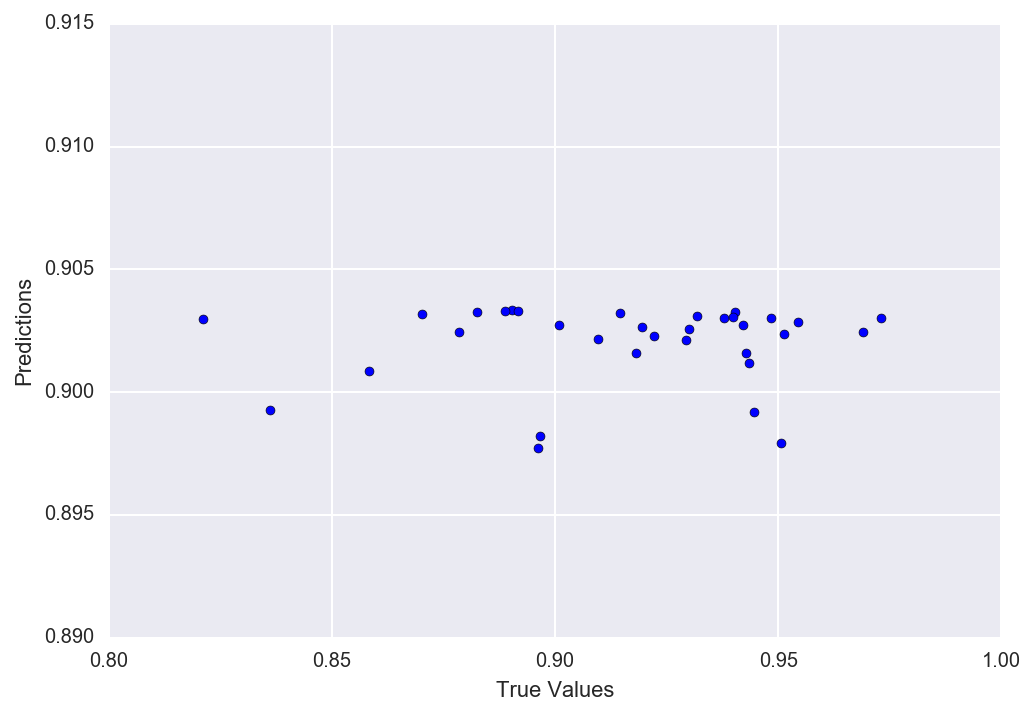

In [11]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

print "Score:", model.score(X_test, y_test)

In [12]:
# plt.scatter(X_test, y_test,  color='black')

In [13]:
# plt.plot(X_test, lm.predict(X_test), color='blue', linewidth=3)

Cross-validated scores: [ 0.00842179 -0.03857708  0.00771171  0.00142065 -0.05996284]
Cross-Predicted Accuracy: -0.00589101200734
Mean scores: -0.0161971559468


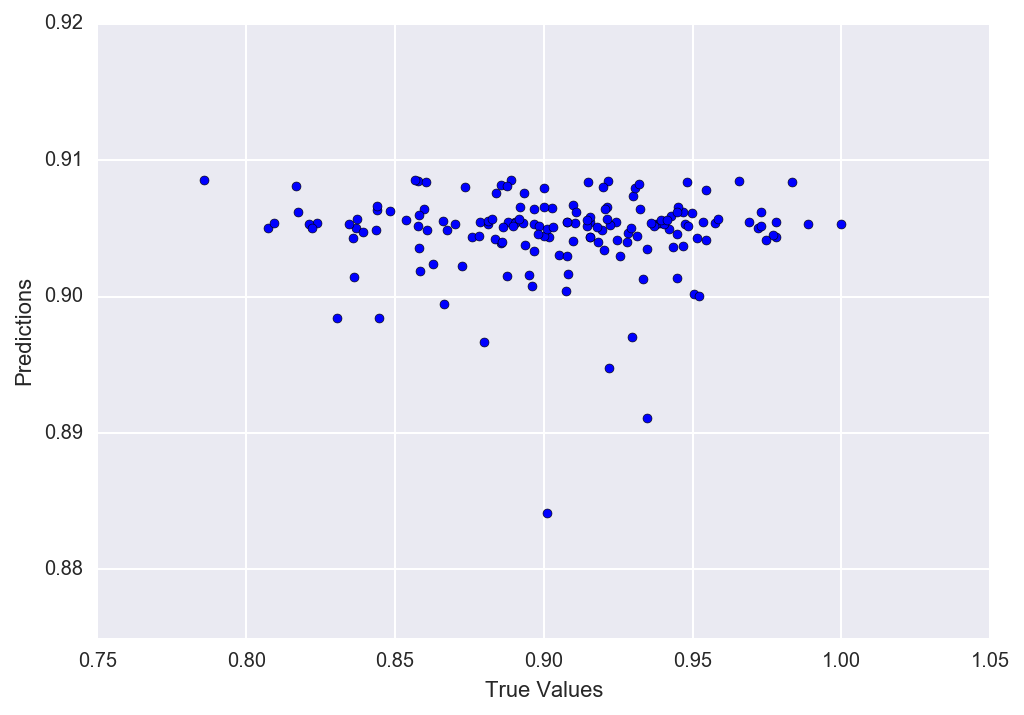

In [14]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(lm, df, y, cv=5)
print "Cross-validated scores:", scores

# # Make cross validated predictions
predictions = cross_val_predict(lm, df, y, cv=5)
plt.scatter(y, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy
print "Mean scores:", np.mean(scores)

In [15]:
# There was significant variance in R^2 when I ran the test/train model multiple times.
# I found the K-fold model to be more consistent (unsurprisingly).

# However, both models were more than sufficient to establish that there is very little correlation
# between ACREAGE and PARK SCORE.

In [16]:
import scipy.stats as stats

print "Pearson Correlation Coefficient:", stats.pearsonr(X, y)[0]

Pearson Correlation Coefficient: -0.0657800112335


In [17]:
# My hypothesis was that larger parks receive higher scores.
# Thorough analysis showed that this hypothesis is almost certainly false.
# None of the models or metrics tested showed a significant correlation between park size and park scores.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [18]:
# From http://stats.stackexchange.com/questions/32596/what-is-the-difference-between-coefficient-of-determination-and-mean-squared

# R2 is a standardized measure of degree of predictedness, or fit, in the sample. 
# MSE is the estimate of variance of residuals, or non-fit, in the population. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [19]:
# businesses = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/san_francisco/yelp_sf_healthcode_violations/businesses.csv')
# code_legend = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/san_francisco/yelp_sf_healthcode_violations/code_legend.csv')
# inspections = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/san_francisco/yelp_sf_healthcode_violations/inspections.csv')
# neighborhood_legend = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/san_francisco/yelp_sf_healthcode_violations/neighborhood_legend.csv')
violations_parsed_words = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/san_francisco/yelp_sf_healthcode_violations/violations_parsed_words.csv')
# violations = pd.read_csv('/Users/alex/Desktop/DSI-SF-2-akodate/datasets/san_francisco/yelp_sf_healthcode_violations/violations.csv')

/Users/alex/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
print violations_parsed_words.shape
violations_parsed_words.head()

(32455, 393)


,business_id,score,date,type,violation_count,days_since_first_violation,name,address,city,state,...,washed fruits,wastewater,wastewater contamination,wastewater disposal,water,water running,wiping,wiping cloths,worker,worker safety
0,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0
1,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0
2,10.0,92.0,2014-01-14,routine,1.0,0.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0
3,10.0,94.0,2014-07-29,routine,2.0,196.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,1,1,0,0,0,0
4,10.0,94.0,2014-07-29,routine,2.0,196.0,TIRAMISU KITCHEN,033 BELDEN PL,San Francisco,CA,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print violations_parsed_words.iloc[:, :20].dtypes

business_id                   float64
score                         float64
date                           object
type                           object
violation_count               float64
days_since_first_violation    float64
name                           object
address                        object
city                           object
state                          object
postal_code                    object
latitude                      float64
longitude                     float64
phone_number                   object
polygon                       float64
neighborhood                   object
population                     object
score_code                     object
business_count                float64
description                    object
dtype: object


In [22]:
violations = violations_parsed_words.iloc[:, :20]
violations['date'] = pd.to_datetime(violations['date'], infer_datetime_format=True)

In [23]:
import re
non_decimal = re.compile(r'[^\d.]+')

violations[['population', 'business_count']] = \
violations[['population', 'business_count']].applymap(lambda x: float(non_decimal.sub('', str(x))))

In [24]:
violations = violations.select_dtypes(['float64', 'datetime64[ns]'])
print violations.corr()['score']
print ''
print violations['score'].describe()

business_id                  -0.044990
score                         1.000000
violation_count               0.057639
days_since_first_violation   -0.006737
latitude                      0.002836
longitude                    -0.004047
polygon                       0.006324
population                   -0.063274
business_count                0.000090
Name: score, dtype: float64

count    32455.000000
mean        86.101186
std          9.386847
min         46.000000
25%         81.000000
50%         88.000000
75%         93.000000
max        100.000000
Name: score, dtype: float64


In [25]:
# Hypothesis: Continuous variables from the violation_parsed_words dataset can be used to predict a restaurant's
# score despite their low Pearson correlations with score.




# Construct and evaluate different models with cross-validated  R2R2 . Compare LinearRegression, Lasso, Ridge, and 
# ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.

# Report on which model is best, and why that might be the case 
# (hint: does your data have multicollinearity? Irrelevant variables? Both?)

# Plot visuals that compare the performance of the four models.

In [43]:
import patsy
from sklearn import grid_search, datasets

df = violations[violations.columns.difference(['score'])]
df['target'] = violations['score']

# Setup patsy design matrix
formula = "target ~ business_count + days_since_first_violation + population + violation_count - 1"
y, X    =  patsy.dmatrices(formula, data=df, return_type="dataframe")

In [44]:
print y.shape
print X.shape

(32455, 1)
(32455, 4)


[-0.01649375  0.04654999 -0.02476074  0.01369266  0.00887672 -0.34613731
  0.00523546 -0.03590041  0.0332571   0.00582508]
-0.0309855203545


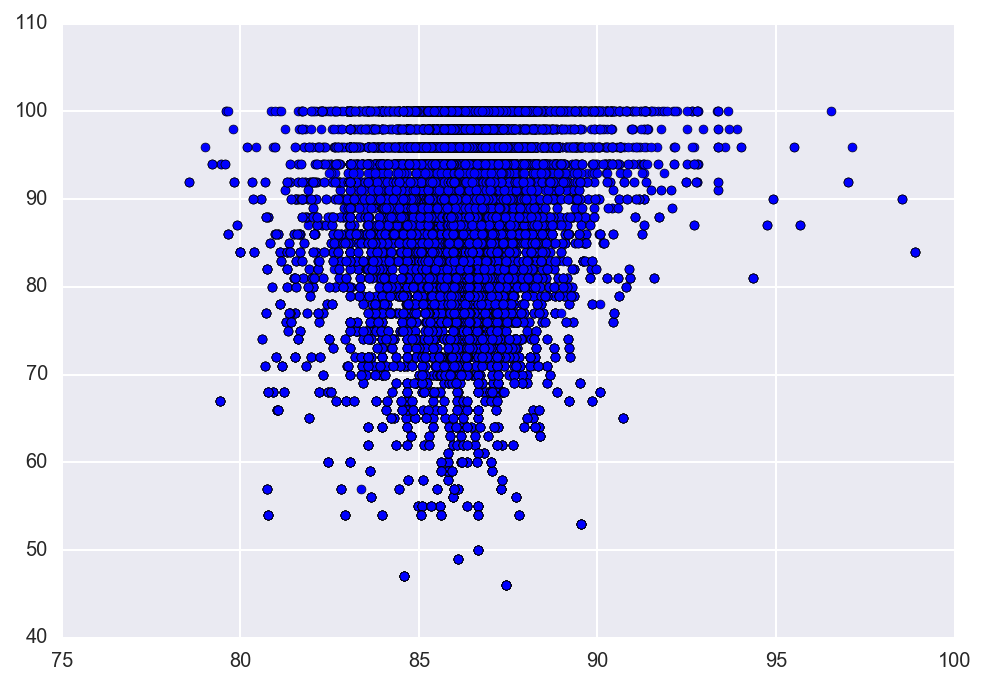

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict

ss = StandardScaler()
Xn = ss.fit_transform(X)

linreg = LinearRegression()
linreg_scores = cross_val_score(linreg, Xn, y, cv=10, verbose=0)

print linreg_scores
print np.mean(linreg_scores)

linreg_predict = cross_val_predict(linreg, Xn, y, cv=10, verbose=0)
plt.scatter(linreg_predict, y)

In [73]:
from sklearn.linear_model import Lasso, LassoCV

ss = StandardScaler()
Xn = ss.fit_transform(X)

optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=0)
optimal_lasso.fit(Xn, np.ravel(y))

print "Optimal alpha:", optimal_lasso.alpha_

# predictions = optimal_lasso.predict(Xn)
# plt.scatter(predictions, y)

Optimal alpha: 0.000593931322032


[-0.01641172  0.04645382 -0.02472692  0.01365964  0.0088703  -0.34617742
  0.00522367 -0.03582041  0.03326194  0.00583914]
-0.0309827959256


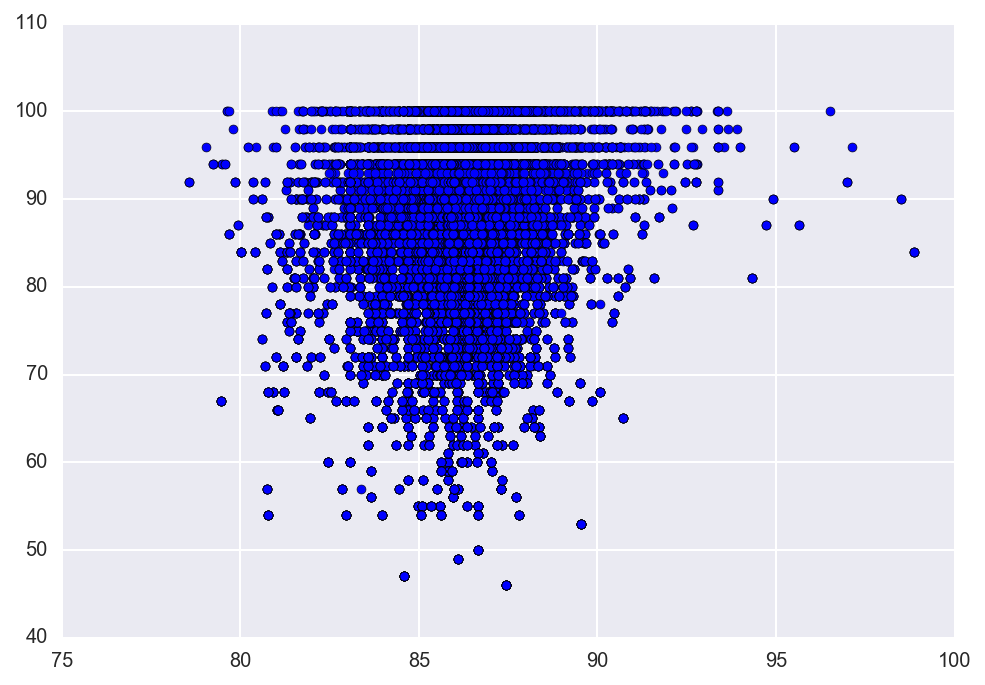

In [74]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, Xn, y, cv=10)

print lasso_scores
print np.mean(lasso_scores)

linreg_predict = cross_val_predict(lasso, Xn, y, cv=10, verbose=0)
plt.scatter(linreg_predict, y)

In [81]:
from sklearn.linear_model import Ridge, RidgeCV

ss = StandardScaler()
Xn = ss.fit_transform(X)

ridge_alphas = np.logspace(0, 5, 200)
print ridge_alphas.shape
optimal_ridge = RidgeCV(ridge_alphas, cv=10)
optimal_ridge.fit(Xn, np.ravel(y))

print "Optimal alpha:", optimal_ridge.alpha_

# predictions = optimal_lasso.predict(Xn)
# plt.scatter(predictions, y)

(200,)
Optimal alpha: 121.738272774


[-0.01470632  0.04587978 -0.02362658  0.01301968  0.00870856 -0.34661054
  0.00472569 -0.03519728  0.0331156   0.00525492]
-0.0309436497885


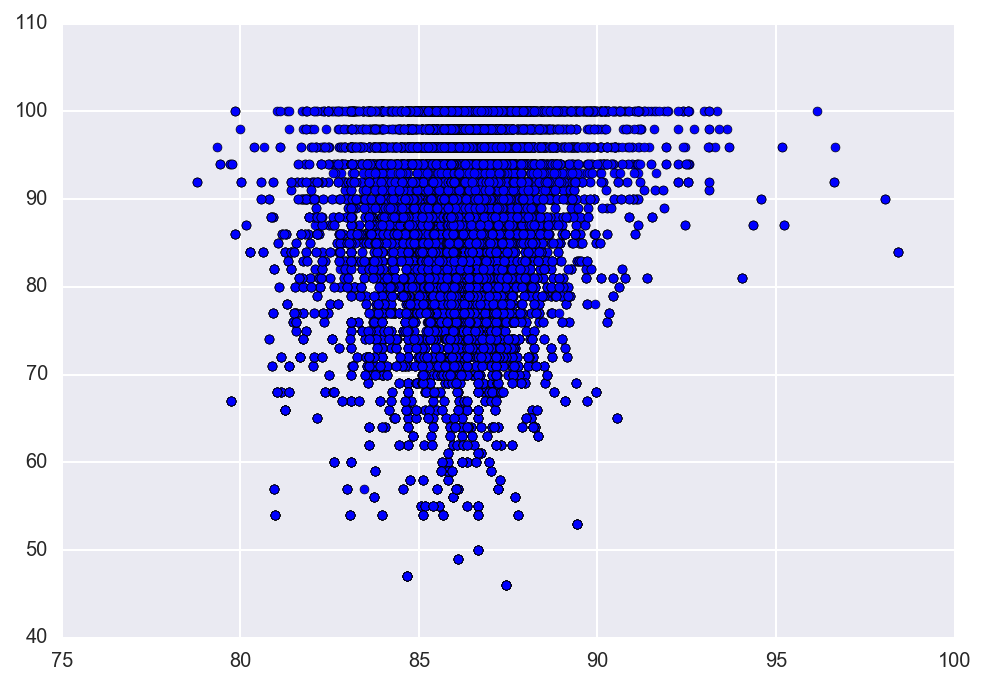

In [82]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xn, y, cv=10)

print ridge_scores
print np.mean(ridge_scores)

linreg_predict = cross_val_predict(ridge, Xn, y, cv=10, verbose=0)
plt.scatter(linreg_predict, y)

In [91]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

ss = StandardScaler()
Xn = ss.fit_transform(X)

optimal_elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], n_alphas=500, cv=10, verbose=1, n_jobs=-1)
optimal_elastic.fit(Xn, np.ravel(y))

print "Optimal alpha:", optimal_elastic.alpha_
print "Optimal L1 ratio:", optimal_elastic.l1_ratio_

# predictions = optimal_lasso.predict(Xn)
# plt.scatter(predictions, y)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Optimal alpha: 0.00227683393178
Optimal L1 ratio: 0.5


[-0.01582824  0.04618398 -0.02437061  0.01344659  0.00882436 -0.34634458
  0.00507546 -0.03554436  0.03323207  0.00569827]
-0.0309627058774


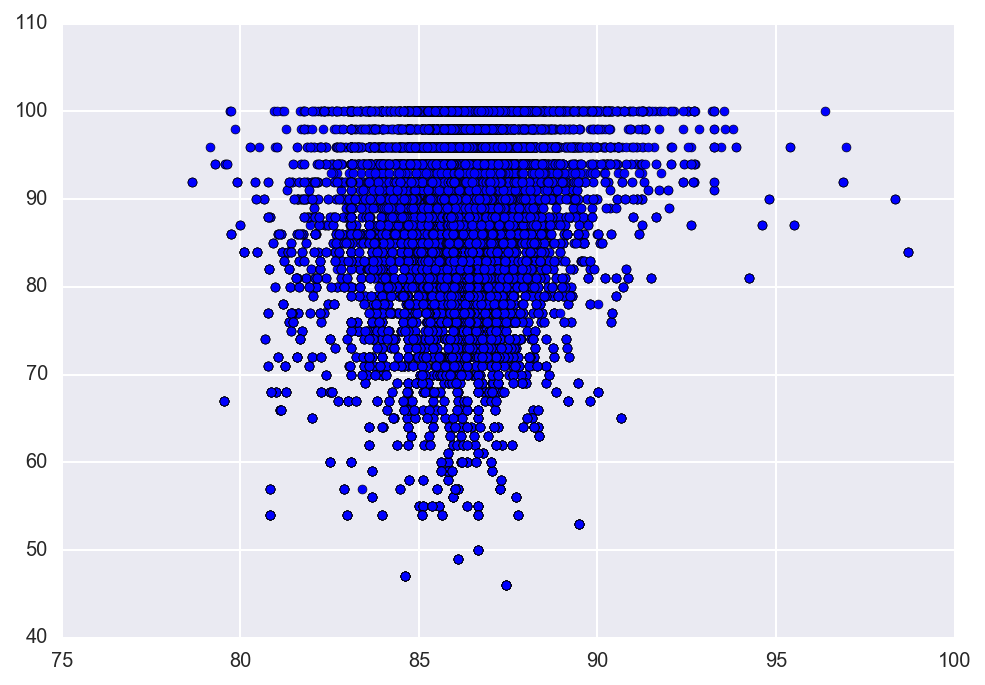

In [92]:
elastic = ElasticNet(alpha=optimal_elastic.alpha_, l1_ratio=optimal_elastic.l1_ratio_)

elastic_scores = cross_val_score(elastic, Xn, y, cv=10)

print elastic_scores
print np.mean(elastic_scores)

linreg_predict = cross_val_predict(elastic, Xn, y, cv=10, verbose=0)
plt.scatter(linreg_predict, y)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?